In [1]:
!pip install cx_Oracle

     ------------------------------------- 213.2/213.2 kB 13.5 MB/s eta 0:00:00


In [42]:
import cx_Oracle
import pandas as pd
import numpy as np

In [3]:
db = cx_Oracle.connect("c##lm", "lm", "localhost:1521/xe")
cursor = db.cursor()
cursor.execute("select * from DEMO")
x = cursor.fetchall()

df = pd.DataFrame(x)

cursor.execute("select column_name from user_tab_columns where table_name = 'DEMO'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
        
df.columns = list1


In [5]:
df

,고객번호,성별,연령대,거주지역
0,00751,M,60세이상,100
1,00752,M,60세이상,440
2,00753,F,60세이상,060
3,00754,F,60세이상,055
4,00755,F,60세이상,100
...,...,...,...,...
19378,19379,F,20세~24세,069
19379,19380,F,20세~24세,039
19380,19381,F,40세~44세,460
19381,19382,F,45세~49세,460


### 과제2_0512
과제 1에서 작성한 테이블을 쥬피터 노트북으로 불러오시오.

In [69]:
db = cx_Oracle.connect("c##lm", "lm", "localhost:1521/xe")
cursor = db.cursor()
cursor.execute("select * from delta2")
x = cursor.fetchall()

df = pd.DataFrame(x)

cursor.execute("SELECT column_name FROM all_tab_columns WHERE table_name = 'delta2'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
        
df.columns = list1

ValueError: Length mismatch: Expected axis has 7 elements, new values have 0 elements

In [70]:
df

,0,1,2,3,4,5,6
0,00001,54041667.0,594,31000883.0,463,-23040784.0,-0.43
1,00002,46245330.0,610,53635430.0,506,7390100.0,0.16
2,00003,1893769.0,739,1271398.0,452,-622371.0,-0.33
3,00004,9299616.0,442,7394194.0,488,-1905422.0,-0.20
4,00005,7685880.0,507,5551190.0,212,-2134690.0,-0.28
...,...,...,...,...,...,...,...
19378,19379,1190620.0,87,4588660.0,497,3398040.0,2.85
19379,19380,522700.0,17,3390277.0,423,2867577.0,5.49
19380,19381,NaN,0,6040669.0,805,NaN,NaN
19381,19382,NaN,0,4401773.0,906,NaN,NaN


In [6]:
df_lm = pd.read_csv('df_lm.csv', index_col = 0)

df_lm

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0
2,3,851215,1042554,592280,679118,M,60세이상,33.0
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0
...,...,...,...,...,...,...,...,...
19378,19379,0,1190620,2395920,2192740,F,20세~24세,69.0
19379,19380,0,522700,837950,2552327,F,20세~24세,39.0
19380,19381,0,0,2797171,3243498,F,40세~44세,460.0
19381,19382,0,0,1826739,2575034,F,45세~49세,460.0


In [23]:
# Q. H1 대비 H4 간의 구매감소 보객의 비중을 구하시오.

delta = df_lm["H4"] - df_lm["H1"]

print(f"{round(len(df_lm[delta < 0])/len(df_lm)*100,2)} %")

42.73 %


In [27]:
# H1 대비 H4 간 고객 별 성장률 컬럼을 추가하시오.

df_lm["grow"] = round((df_lm["H4"]-df_lm["H1"])/df_lm["H1"],2)

In [28]:
df_lm

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,grow
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-0.34
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0,0.06
2,3,851215,1042554,592280,679118,M,60세이상,33.0,-0.20
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-0.26
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-0.52
...,...,...,...,...,...,...,...,...,...
19378,19379,0,1190620,2395920,2192740,F,20세~24세,69.0,inf
19379,19380,0,522700,837950,2552327,F,20세~24세,39.0,inf
19380,19381,0,0,2797171,3243498,F,40세~44세,460.0,inf
19381,19382,0,0,1826739,2575034,F,45세~49세,460.0,inf


CAGR(Compound Annual Growth Rate)
- 연복리 성장률을 나타내는 지표
- 주어진 기간 동안의 성장률을 하나의 수치로 요약하여 비교 및 분석에 용이
- 장점은 단순 평균 수익률보다 정확한 성장률을 제공하고, 시간에 따른 변동성을 고려하여 성장률을 측정
- 한계는 특정기간 동안의 평균 성장률을 알려주지만, 성장률의 변동성이나 시계열 데이터의 패턴은 미 반영
- 변동성이나 패턴을 반영하는 지표는 표준편차, 변동계수, 이동평균, 지수 이동평균, 상대강도지수 등이 있음
- CAGR = (최종 가치 / 초기 가치) ^ (1 / 기간) - 1

In [32]:
df_lm["CAGR"] = (df_lm["H4"]/df_lm["H1"]) ** (1/4) - 1

In [34]:
df_lm.set_index("고객번호")

,H1,H2,H3,H4,성별,연령대,거주지역,grow,CAGR
고객번호,,,,,,,,,
1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-0.34,-0.099493
2,24323230,21922100,27791610,25843820,M,60세이상,100.0,0.06,0.015275
3,851215,1042554,592280,679118,M,60세이상,33.0,-0.20,-0.054903
4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-0.26,-0.072134
5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-0.52,-0.168008
...,...,...,...,...,...,...,...,...,...
19379,0,1190620,2395920,2192740,F,20세~24세,69.0,inf,inf
19380,0,522700,837950,2552327,F,20세~24세,39.0,inf,inf
19381,0,0,2797171,3243498,F,40세~44세,460.0,inf,inf


In [40]:
# Q. H1 대비 H4 간의 구매감소 고객의 비중을 구하시오. (cagr 기준)

print(f'''{len(df_lm[df_lm["CAGR"] < 0])/len(df_lm)*100} %''')

42.733323015013156 %


<AxesSubplot:>

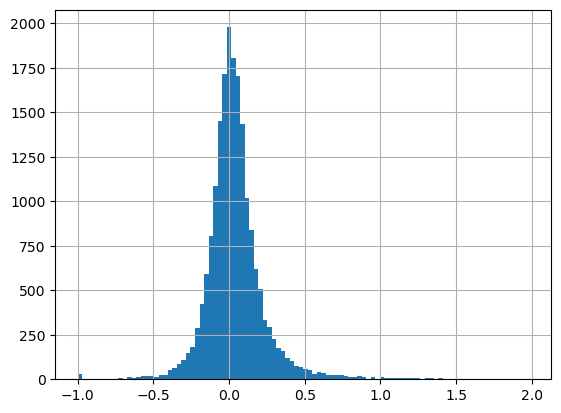

In [45]:
df_lm["CAGR"][~np.isinf(df_lm["CAGR"]) & (df_lm["CAGR"] <= 2)].hist(bins=100)

### 과제 3_0512 employees 테이블을 불러와서 다음 사항을 수행하시오.
- 컬럼 명을 포함하여 employees 테이블을 데이터프레임으로 출력
- department_id 별 평균 연봉을 출력
- 부서 별 평균 연봉을 수평 그래프로 시각화

In [53]:
db = cx_Oracle.connect("c##hmkd1", "hmkd1", "localhost:1521/xe")
cursor = db.cursor()
cursor.execute("select * from employees")
x = cursor.fetchall()

df = pd.DataFrame(x)

cursor.execute("SELECT column_name FROM all_tab_columns WHERE table_name = 'EMPLOYEES'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
        
df.columns = list1


In [55]:
df

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,2002-06-07,HR_REP,6500.0,NaN,101.0,40.0
104,204,Hermann,Baer,HBAER,515.123.8888,2002-06-07,PR_REP,10000.0,NaN,101.0,70.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,2002-06-07,AC_MGR,12008.0,NaN,101.0,110.0


In [66]:
df2 = df[["SALARY","DEPARTMENT_ID"]].groupby("DEPARTMENT_ID").mean()

<AxesSubplot:xlabel='DEPARTMENT_ID'>

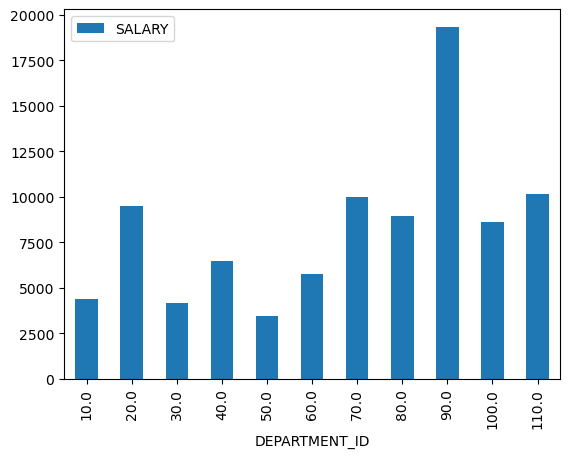

In [67]:
df2.plot(kind = "bar")

### 과제 4_0512.
과제 2에서 불러온 데이터프레임을 통계적 시각적으로 탐색하여 인사이트를 도출하시오.